In [1]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from utils import load, plot_history, compose_alpha
from models import own_custom_conv_net, neuralmon_conv_net, smaller_VGGNet

In [2]:
def custom_CNN_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)),   
        
        layers.Conv2D(32, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 
        
        layers.Conv2D(64, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 

        layers.Conv2D(128, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 
        
        layers.Conv2D(150, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 
        
        layers.Flatten(), 
        layers.Dense(64, activation='relu'), 
        layers.Dense(18, activation='sigmoid'), 
    ])
    
    return model

In [3]:
train_dataset, val_dataset = load(csv="pokemon_image_dataset.csv", image_path="./images/pokemon_image_dataset")
train_dataset2, val_dataset2 = load(csv="synthetic_pokemon.csv", image_path="./images/synthetic_pokemon")
train_dataset3, val_dataset3 = load(csv="synthetic_pokemon_v2.csv", image_path="./images/synthetic_pokemon_v2")

In [4]:
histories = []

In [5]:
def compute_class_weights(dataset):
    # Initialize counters
    positive_counts = tf.zeros(18, dtype=tf.int32)
    total_samples = 0

    # Iterate over the dataset
    for _, labels in dataset:
        positive_counts += tf.reduce_sum(labels, axis=0)
        total_samples += tf.shape(labels)[0]

    # Convert to numpy for easier manipulation
    positive_counts = positive_counts.numpy()
    total_samples = total_samples.numpy()

    # Calculate class weights
    class_weights = {}
    for i in range(18):
        if positive_counts[i] > 0:
            class_weights[i] = (1 / positive_counts[i]) * (total_samples / 2.0)
        else:
            class_weights[i] = 1.0  # Assign a neutral weight if the class doesn't appear

    return class_weights

class_weights = compute_class_weights(train_dataset)
print(class_weights)

{0: 2.8130434782608695, 1: 3.718390804597701, 2: 3.993827160493827, 3: 4.256578947368421, 4: 4.75735294117647, 5: 4.8283582089552235, 6: 6.221153846153847, 7: 6.3431372549019605, 8: 5.9907407407407405, 9: 7.523255813953488, 10: 7.3522727272727275, 11: 8.743243243243244, 12: 8.98611111111111, 13: 9.51470588235294, 14: 8.98611111111111, 15: 8.743243243243244, 16: 9.803030303030303, 17: 11.981481481481481}


In [6]:
model_BCLoss = custom_CNN_model((120,120,3))

model_BCLoss.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

history1 = model_BCLoss.fit(
    train_dataset,
    epochs = 35,
    validation_data = val_dataset,
    verbose = 1
)
histories.append(history1)

c:\Uni\Enhancing-Pokemon-Type-Recognition-with-Hybrid-Datasets\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 299ms/step - AUC: 0.5376 - Precision: 0.0993 - Recall: 0.1574 - accuracy: 0.1149 - loss: 0.4720 - val_AUC: 0.5841 - val_Precision: 0.1762 - val_Recall: 0.1613 - val_accuracy: 0.1111 - val_loss: 0.4461
Epoch 2/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - AUC: 0.6713 - Precision: 0.4815 - Recall: 0.0332 - accuracy: 0.2163 - loss: 0.2771 - val_AUC: 0.5268 - val_Precision: 0.1024 - val_Recall: 0.0546 - val_accuracy: 0.0617 - val_loss: 0.3692
Epoch 3/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - AUC: 0.7650 - Precision: 0.6233 - Recall: 0.0595 - accuracy: 0.3286 - loss: 0.2495 - val_AUC: 0.5566 - val_Precision: 0.1527 - val_Recall: 0.1292 - val_accuracy: 0.1605 - val_loss: 0.3912
Epoch 4/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - AUC: 0.8196 - Precision: 0.7851 - Recall: 0.0976 - accuracy: 0.3848 - loss: 0.2307 - val_AUC: 0.6150 - val_Precision: 0.1354 - val_Recall: 0.1888 - val_accuracy: 0.1296 - val_loss: 0.4366
Epoch 5/35
21/21 ━━━━━━━━━━━━━━

In [7]:
model_BCLoss_weighted = custom_CNN_model((120,120,3))

model_BCLoss_weighted.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

history2 = model_BCLoss_weighted.fit(
    train_dataset,
    epochs = 35,
    validation_data = val_dataset,
    verbose = 1,
    class_weight=class_weights
)
histories.append(history2)

Epoch 1/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 302ms/step - AUC: 0.4898 - Precision: 0.0676 - Recall: 0.1234 - accuracy: 0.0473 - loss: 2.5053 - val_AUC: 0.5100 - val_Precision: 0.1010 - val_Recall: 0.1566 - val_accuracy: 0.0741 - val_loss: 0.5178
Epoch 2/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 258ms/step - AUC: 0.6347 - Precision: 0.1112 - Recall: 0.0034 - accuracy: 0.1387 - loss: 1.4894 - val_AUC: 0.5448 - val_Precision: 0.0870 - val_Recall: 0.0080 - val_accuracy: 0.0926 - val_loss: 0.3531
Epoch 3/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - AUC: 0.7830 - Precision: 0.6706 - Recall: 0.0438 - accuracy: 0.3118 - loss: 1.2491 - val_AUC: 0.5757 - val_Precision: 0.1365 - val_Recall: 0.1660 - val_accuracy: 0.1358 - val_loss: 0.3979
Epoch 4/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 242ms/step - AUC: 0.8239 - Precision: 0.8555 - Recall: 0.0967 - accuracy: 0.4110 - loss: 1.1543 - val_AUC: 0.6622 - val_Precision: 0.2379 - val_Recall: 0.2448 - val_accuracy: 0.2222 - val_loss: 0.4117
Epoch 5/35
21/21 ━━━━━━━━━━━━━━

In [8]:
model_BCFLoss = custom_CNN_model((120,120,3))

model_BCFLoss.compile(optimizer='adam',
            loss='binary_focal_crossentropy',
            metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

history3 = model_BCFLoss.fit(
    train_dataset,
    epochs = 35,
    validation_data = val_dataset,
    verbose = 1
)
histories.append(history3)

Epoch 1/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - AUC: 0.5069 - Precision: 0.0864 - Recall: 0.2446 - accuracy: 0.0580 - loss: 0.2467 - val_AUC: 0.5410 - val_Precision: 0.0867 - val_Recall: 0.2647 - val_accuracy: 0.0247 - val_loss: 0.5700
Epoch 2/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - AUC: 0.6645 - Precision: 0.2760 - Recall: 0.0677 - accuracy: 0.1687 - loss: 0.0818 - val_AUC: 0.5717 - val_Precision: 0.1344 - val_Recall: 0.3156 - val_accuracy: 0.1173 - val_loss: 0.2165
Epoch 3/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - AUC: 0.7441 - Precision: 0.4611 - Recall: 0.0879 - accuracy: 0.2382 - loss: 0.0707 - val_AUC: 0.5699 - val_Precision: 0.1437 - val_Recall: 0.2090 - val_accuracy: 0.1667 - val_loss: 0.1171
Epoch 4/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - AUC: 0.8096 - Precision: 0.5933 - Recall: 0.0971 - accuracy: 0.3121 - loss: 0.0637 - val_AUC: 0.6733 - val_Precision: 0.2528 - val_Recall: 0.1852 - val_accuracy: 0.1667 - val_loss: 0.0909
Epoch 5/35
21/21 ━━━━━━━━━━━━━━━

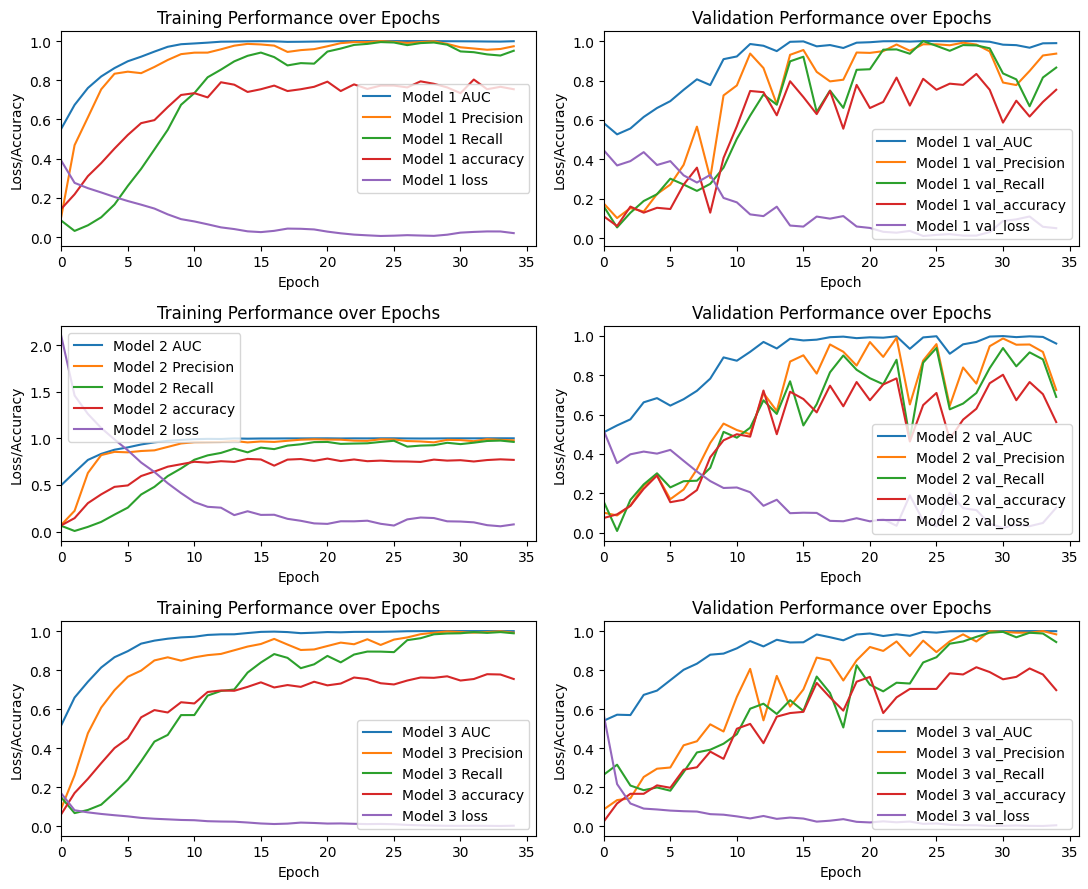

In [12]:
def plot_history(histories):
    # Create a figure with two subplots: one for loss, one for accuracy
    fig, axs = plt.subplots(len(histories), 2, figsize=(11, len(histories)*3))
    if len(histories) == 1:
        axs = [axs]
    for i, (history, (ax1, ax2)) in enumerate(zip(histories,axs)):
        # Iterate over each history and label to plot on the same figure
        # Plot all metrics included in the history object
        for key in history.history.keys():
            # check if the key includes "val" or not
            if 'val' in key:
                ax2.plot(history.history[key], label='Model '+str(i+1)+' '+key)
            else:
                ax1.plot(history.history[key], label='Model '+str(i+1)+' '+key)

        # Customize loss subplot
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss/Accuracy')
        ax1.set_title('Training Performance over Epochs')
        ax1.legend()
        ax1.set_xlim(left=0)  # Ensure the x-axis starts at 0

        # Customize accuracy subplot
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss/Accuracy')
        ax2.set_title('Validation Performance over Epochs')
        ax2.legend()
        ax2.set_xlim(left=0)  # Ensure the x-axis starts at 0
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    
plot_history(histories)

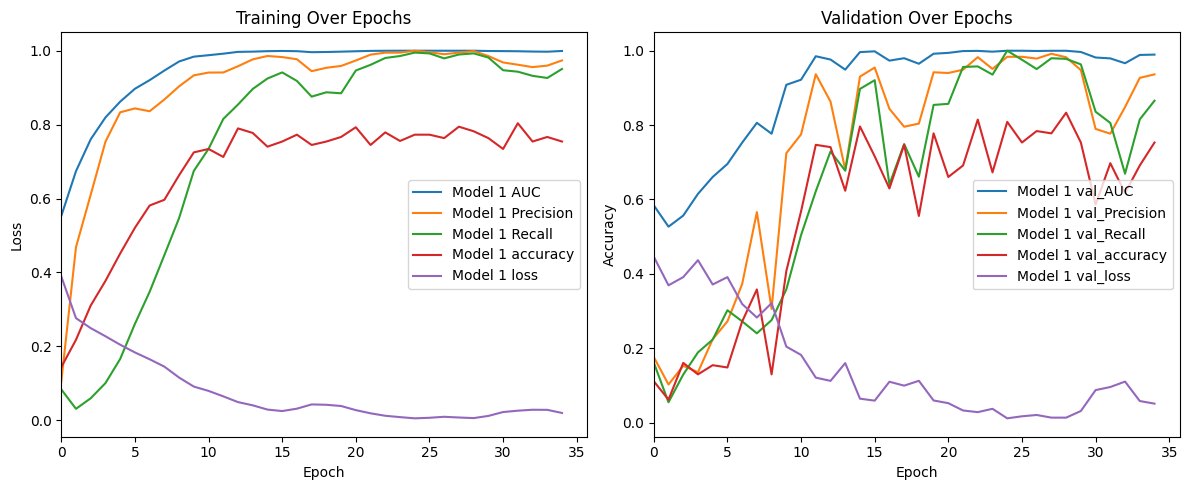

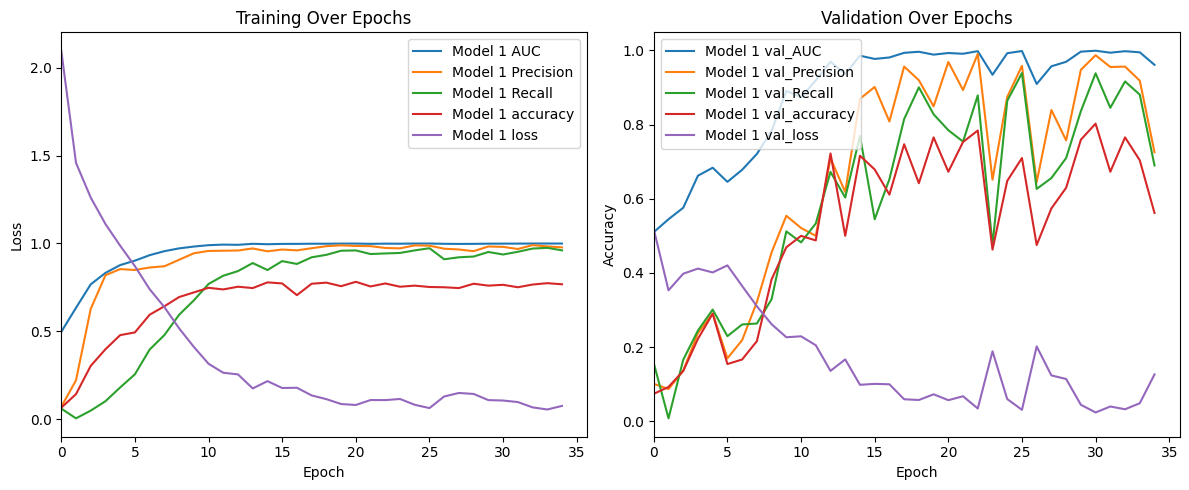

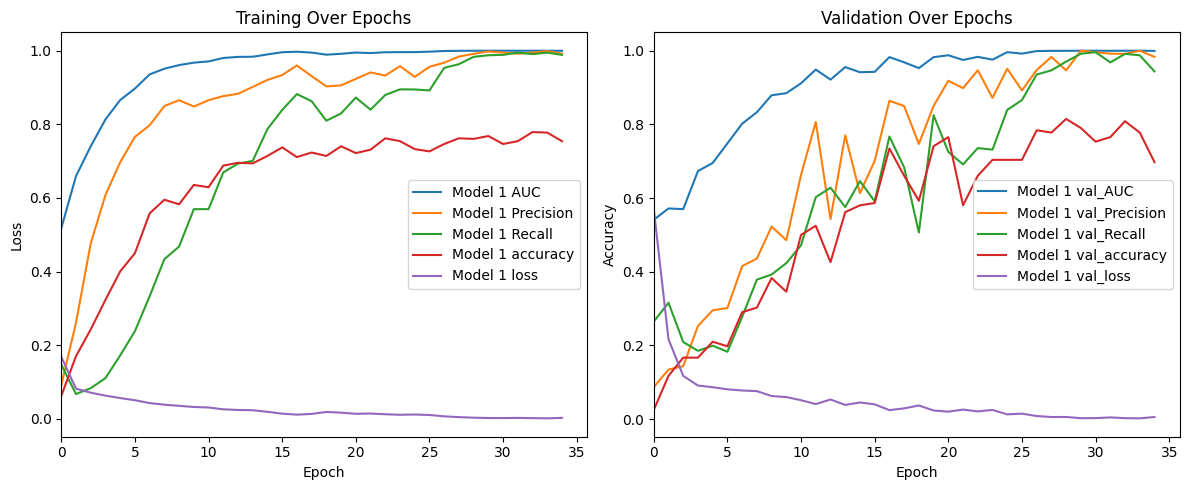

In [10]:
def plot_seperate_history(histories):
    # Create a figure with two subplots: one for loss, one for accuracy
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Iterate over each history and label to plot on the same figure
    for i, history in enumerate(histories):
        
        # Plot all metrics included in the history object
        for key in history.history.keys():
            # check if the key includes "val" or not
            if 'val' in key:
                ax2.plot(history.history[key], label='Model '+str(i+1)+' '+key)
            else:
                ax1.plot(history.history[key], label='Model '+str(i+1)+' '+key)

    # Customize loss subplot
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training Over Epochs')
    ax1.legend()
    ax1.set_xlim(left=0)  # Ensure the x-axis starts at 0

    # Customize accuracy subplot
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Validation Over Epochs')
    ax2.legend()
    ax2.set_xlim(left=0)  # Ensure the x-axis starts at 0

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    
for history in histories:
    plot_seperate_history([history])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
tf.Tensor([1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(18,), dtype=int32)
[0.994 0.001 0.    0.002 0.    0.192 0.001 0.    0.    0.    0.007 0.
 0.001 0.    0.005 0.012 0.019 0.   ]
(120, 120, 3)
Accuracy:  [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [0. 1. 1. 1

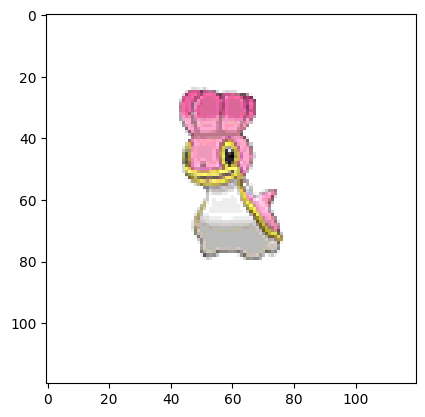

In [11]:
for sample in val_dataset:
    pred = model_BCLoss.predict(sample[0])
    pred = model_BCLoss(sample[0], training=False)
    print(sample[1][0])
    print(np.around(pred[0], decimals=3))
    img = sample[0][0].numpy()
    print(img.shape)
    # print tensorflow accuracy of the prediction
    print("Accuracy: ", tf.keras.metrics.binary_accuracy(sample[1], pred).numpy())

    plt.imshow(img, interpolation='nearest')
    plt.show()
    break